In [1]:
import pandas as pd

train_dataset = pd.read_csv("adult.train.csv", sep=", ").drop_duplicates()
test_dataset = pd.read_csv("adult.train.csv", sep=", ").drop_duplicates()
train_dataset

/Users/d.voitekh/.pyenv/versions/3.6.2/envs/virtualenv-3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/d.voitekh/.pyenv/versions/3.6.2/envs/virtualenv-3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
import pandas_profiling

pandas_profiling.ProfileReport(train_dataset)

Number of variables,16
Number of observations,32537
Total Missing (%),0.0%
Total size in memory,4.0 MiB
Average record size in memory,128.0 B
Numeric,7
Categorical,9
Date,0
Text (Unique),0
Rejected,0
Distinct count,73


In [282]:
pandas_profiling.ProfileReport(test_dataset)

Number of variables,16
Number of observations,32537
Total Missing (%),0.0%
Total size in memory,4.0 MiB
Average record size in memory,128.0 B
Numeric,7
Categorical,9
Date,0
Text (Unique),0
Rejected,0
Distinct count,73


In [2]:
train_dataset = train_dataset.filter(items=set(train_dataset.columns) - {"capital-gain", "capital-loss", "education", "occupation", "relationship", "native-country"})
test_dataset = test_dataset.filter(items=set(test_dataset.columns) - {"capital-gain", "capital-loss", "education", "occupation", "relationship", "native-country"})
workclass = ['?', 'Never-worked', 'Without-pay', 'Self-emp-not-inc', 'Self-emp-inc', 'Private', 'Local-gov', 'Federal-gov', 'State-gov']
marital_status = ['Never-married', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Married-civ-spouse']
race = ['Other', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Black', 'White']
sex = ['Male', 'Female']

def preprocess_row(row):
    if "<=50" in row["income"]:
        row["income"] = 0
    else:
        row["income"] = 1
    row["workclass"] = workclass.index(row["workclass"])
    row["marital-status"] = marital_status.index(row["marital-status"])
    row["race"] = race.index(row["race"])
    row["sex"] = sex.index(row["sex"])
    return row  

train_dataset = train_dataset.apply(preprocess_row, axis=1)
test_dataset = test_dataset.apply(preprocess_row, axis=1)
train_dataset

,sex,race,hours-per-week,marital-status,fnlwgt,income,age,education-num,workclass
0,0,4,40,0,77516,0,39,13,8
1,0,4,13,6,83311,0,50,13,3
2,0,4,40,2,215646,0,38,9,5
3,0,3,40,6,234721,0,53,7,5
4,1,3,40,6,338409,0,28,13,5
5,1,4,40,6,284582,0,37,14,5
6,1,3,16,4,160187,0,49,5,5
7,0,4,45,6,209642,1,52,9,3
8,1,4,50,0,45781,1,31,14,5
9,0,4,40,6,159449,1,42,13,5


In [3]:
from graphviz import Source
from sklearn import tree

train_data = train_dataset.filter(items=set(train_dataset.columns) - {"income"})
test_data = test_dataset.filter(items=set(test_dataset.columns) - {"income"})

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data.as_matrix(), train_dataset["income"].as_matrix())

# tree.export_graphviz(clf, out_file='tree.dot', feature_names=train_data.columns, class_names=["<=50K", ">50K"])
# Source(tree.export_graphviz(clf, out_file=None, feature_names=train_data.columns, class_names=["<=50K", ">50K"]))

In [4]:
labels = clf.predict(test_data)
clf.score(test_data, test_dataset["income"].as_matrix())

0.99938531517964169

In [5]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_dataset['income'].as_matrix(), labels, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.99872432708253611

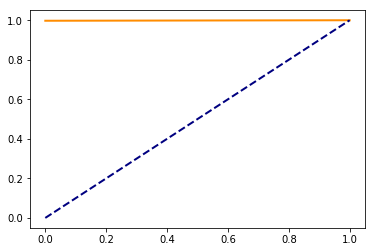

In [6]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score

cross_dataset = np.concatenate((train_data.as_matrix(), test_data.as_matrix()))
cross_labels = np.concatenate((train_dataset["income"].as_matrix(), test_dataset["income"].as_matrix()))

cross_val_score(clf, cross_dataset, cross_labels, cv=10)

array([ 0.99907806,  0.99938537,  0.99877074,  0.99830977,  0.99877074,
        0.99907806,  0.99938528,  0.99877055,  0.99830925,  0.99877037])